#                                         Course: Deep Learning
### Name: SAYEDPEDRAM HAERI BOROUJENI
### Instructor: Dr. Feng Luo
### Home Work: Number One
### Part 1: Deep vs Shallow

## 1. Import My Packages

In [6]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.backends.cudnn as cudnn
import torchvision.transforms as transformtransforms
from torchvision import models
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToPILImage
from tqdm import tqdm
import copy
import math
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms.functional as TF
from torchvision import transforms
import cv2
import random
from PIL import Image
from glob import glob
from torch import nn

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
TORCH_CUDA_ARCH_LIST="8.6"

Project_PATH = os.path.dirname(os.path.abspath('__file__'))
outputs_dir = Project_PATH + '/Desktop/Deep Learning HW1'
model_path = Project_PATH + '/My Model/'

## 2. My Device

In [7]:
device_default = torch.cuda.current_device()
torch.cuda.device(device_default)
device = torch.device("cuda")
print("torch.cuda.is_available:", torch.cuda.is_available())
print("torch.cuda.device_count:", torch.cuda.device_count())
print("torch.cuda.current_device:", torch.cuda.current_device())
print("torch.cuda.get_device_name:", torch.cuda.get_device_name(device_default))
print("torch.version.cuda:", torch.version.cuda)
print("torch.version:", torch.__version__)
print("torch.cuda.arch_list:", torch.cuda.get_arch_list())

torch.cuda.is_available: True
torch.cuda.device_count: 1
torch.cuda.current_device: 0
torch.cuda.get_device_name: NVIDIA RTX A5000
torch.version.cuda: 11.3
torch.version: 1.11.0
torch.cuda.arch_list: ['sm_37', 'sm_50', 'sm_60', 'sm_61', 'sm_70', 'sm_75', 'sm_80', 'sm_86', 'compute_37']


## 3. My Models: DNN with 8 Layers, 5 Layers, 2 Layers

In [8]:
# DNN with 8 Layers
class DNN_8L_Model(nn.Module):
    def __init__(self):
        super(DNN_8L_Model, self, ).__init__()
        self.layer1 = nn.Sequential(nn.Linear(1, 5),nn.ReLU(True))
        self.layer2 = nn.Sequential(nn.Linear(5, 10),nn.ReLU(True))
        self.layer3 = nn.Sequential(nn.Linear(10, 10),nn.ReLU(True))
        self.layer4 = nn.Sequential(nn.Linear(10, 10),nn.ReLU(True))
        self.layer5 = nn.Sequential(nn.Linear(10, 10),nn.ReLU(True))
        self.layer6 = nn.Sequential(nn.Linear(10, 10),nn.ReLU(True))
        self.layer7 = nn.Sequential(nn.Linear(10, 5),nn.ReLU(True))
        self.layer8 = nn.Sequential(nn.Linear(5, 1))
    def forward(self, x):
        x = self.layer1(x) 
        x = self.layer2(x)    
        x = self.layer3(x)    
        x = self.layer4(x)    
        x = self.layer5(x)    
        x = self.layer6(x)    
        x = self.layer7(x)    
        x = self.layer8(x)    
        return x
    
device = torch.device("cuda")
Model_DNN_8 = DNN_8L_Model().to(device)
summary(Model_DNN_8, (1,1))

# DNN with 5 Layers
class DNN_5L_Model(nn.Module):
    def __init__(self):
        super(DNN_5L_Model, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(1, 10),nn.ReLU(True))
        self.layer2 = nn.Sequential(nn.Linear(10, 18),nn.ReLU(True))
        self.layer3 = nn.Sequential(nn.Linear(18, 15),nn.ReLU(True))
        self.layer4 = nn.Sequential(nn.Linear(15, 4),nn.ReLU(True))
        self.layer5 = nn.Sequential(nn.Linear(4, 1))
    def forward(self, x):
        x = self.layer1(x) 
        x = self.layer2(x)    
        x = self.layer3(x)    
        x = self.layer4(x)    
        x = self.layer5(x)      
        return x
    
device = torch.device("cuda")
Model_DNN_5 = DNN_5L_Model().to(device)
summary(Model_DNN_5, (1,1))

# DNN with 2 Layers
class DNN_2L_Model(nn.Module):
    def __init__(self):
        super(DNN_2L_Model, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(1, 190),nn.ReLU(True))
        self.layer2 = nn.Sequential(nn.Linear(190, 1))
    def forward(self, x):
        x = self.layer1(x) 
        x = self.layer2(x)         
        return x
    
device = torch.device("cuda")
Model_DNN_2 = DNN_2L_Model().to(device)
summary(Model_DNN_2, (1,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 5]              10
              ReLU-2                 [-1, 1, 5]               0
            Linear-3                [-1, 1, 10]              60
              ReLU-4                [-1, 1, 10]               0
            Linear-5                [-1, 1, 10]             110
              ReLU-6                [-1, 1, 10]               0
            Linear-7                [-1, 1, 10]             110
              ReLU-8                [-1, 1, 10]               0
            Linear-9                [-1, 1, 10]             110
             ReLU-10                [-1, 1, 10]               0
           Linear-11                [-1, 1, 10]             110
             ReLU-12                [-1, 1, 10]               0
           Linear-13                 [-1, 1, 5]              55
             ReLU-14                 [-

## 4. My Function Simulation

## 4.1. F1(x) = sin(5*np.pi*x)/(5*np.pi*x)

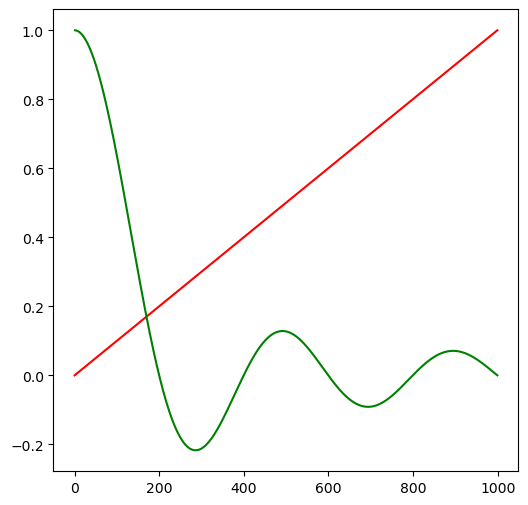

In [10]:
x = torch.linspace(0,1,1000).unsqueeze(1)
y = torch.sin(5*np.pi*x)/(5*np.pi*x)
plt.figure(figsize=(6,6))
plt.plot(x,"red")
plt.plot(y, "green")

## 4.2. F2(x) = sgn(torch.sin(5*np.pi*x), 0)

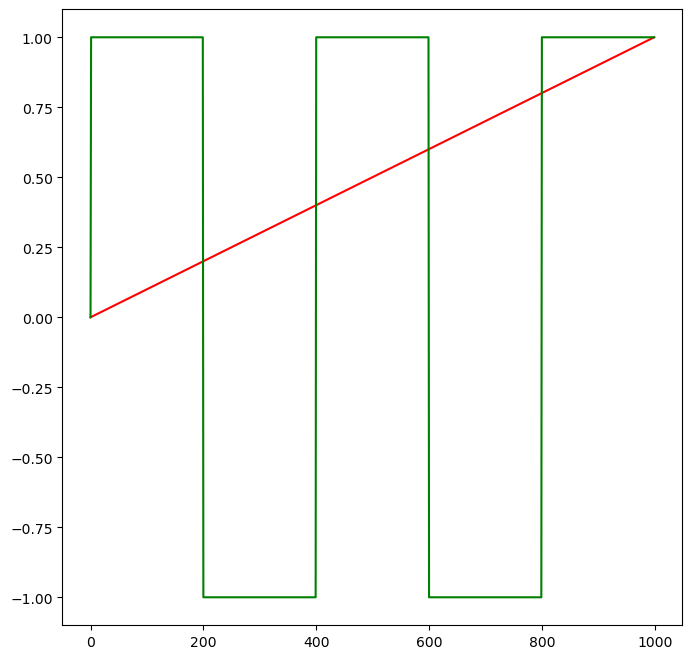

In [11]:
def sgn(x, y):
    h,w = list(x.size())
    Y = torch.rand(h,w)
    for i in range(h):
        if(x[i] > y): Y[i] = 1
        if(x[i] < y): Y[i] = -1
        if(x[i] == y): Y[i] = 0
    return Y

x = torch.linspace(0,1,1000).unsqueeze(1)
y = sgn(torch.sin(5*np.pi*x), 0)
plt.figure(figsize=(8,8))
plt.plot(x, "red")
plt.plot(y, "green")

## 4.3. Initialization 

In [12]:
x = torch.linspace(0,1,1000).unsqueeze(1)
y = torch.sin(5*np.pi*x)/(5*np.pi*x)
y[0] = y[1]
function1 = y

y = sgn(torch.sin(5*np.pi*x), 0)
function2 = y

## 4.4. Training 

In [13]:
def train(function,
          model_name,
          Epochs = 20000,
          Batch  = 1000,
          Data_workers = 0,
          LR = 0.0005):

    torch.cuda.is_available()
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
    Model = model_name().to(device)
    x = torch.linspace(0,1,1000).unsqueeze(1)
    x = x.to(device)
    y = function.to(device)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(Model.parameters(), lr=LR)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 100, gamma = 0.8)

    trainloss_list = []
    lr_list = []
    
    for epoch in range(Epochs):
        Model.train()
        train_loss = 0.0
        y_pred = Model(x)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss = loss.item()
        trainloss_list.append(train_loss)
        lr_list.append(optimizer.state_dict()['param_groups'][0]['lr'])
        if epoch >= Epochs//2:
            scheduler.step()

        if epoch % (Epochs//10) == 0:
            print('{}/{}, loss: {}'.format(epoch,Epochs,train_loss))
            
    return [Model,trainloss_list,lr_list]

In [14]:
[Model_F1_8L,trainloss_F1_8L,lr_F1_8L] = train(function1, DNN_8L_Model, Epochs=5000, Batch=1000, Data_workers=0, LR=0.005)
[Model_F1_5L,trainloss_F1_5L,lr_F1_5L] = train(function1, DNN_5L_Model, Epochs=5000, Batch=1000, Data_workers=0, LR=0.005)
[Model_F1_2L,trainloss_F1_2L,lr_F1_2L] = train(function1, DNN_2L_Model, Epochs=5000, Batch=1000, Data_workers=0, LR=0.005)

0/5000, loss: 0.08884409070014954
500/5000, loss: 0.00031075175502337515
1000/5000, loss: 0.0003412480291444808
1500/5000, loss: 0.00021367848967202008
2000/5000, loss: 0.00016854458954185247
2500/5000, loss: 0.00012329664605204016
3000/5000, loss: 8.833206811686978e-05
3500/5000, loss: 7.859340985305607e-05
4000/5000, loss: 7.503526285290718e-05
4500/5000, loss: 7.292279769899324e-05
0/5000, loss: 0.20190690457820892
500/5000, loss: 0.08747661113739014
1000/5000, loss: 0.08747661113739014
1500/5000, loss: 0.08747661113739014
2000/5000, loss: 0.08747661113739014
2500/5000, loss: 0.08747661113739014
3000/5000, loss: 0.08747661113739014
3500/5000, loss: 0.08747661113739014
4000/5000, loss: 0.08747661113739014
4500/5000, loss: 0.08747661113739014
0/5000, loss: 0.09659905731678009
500/5000, loss: 0.000659201992675662
1000/5000, loss: 0.0004328907234594226
1500/5000, loss: 0.0003688787401188165
2000/5000, loss: 0.0003107521333731711
2500/5000, loss: 0.0002256224543089047
3000/5000, loss: 0.

Model_F1_8L loss: 7.200584514066577e-05
Model_F1_5L loss: 0.08747661113739014
Model_F1_2L loss: 0.00016157510981429368


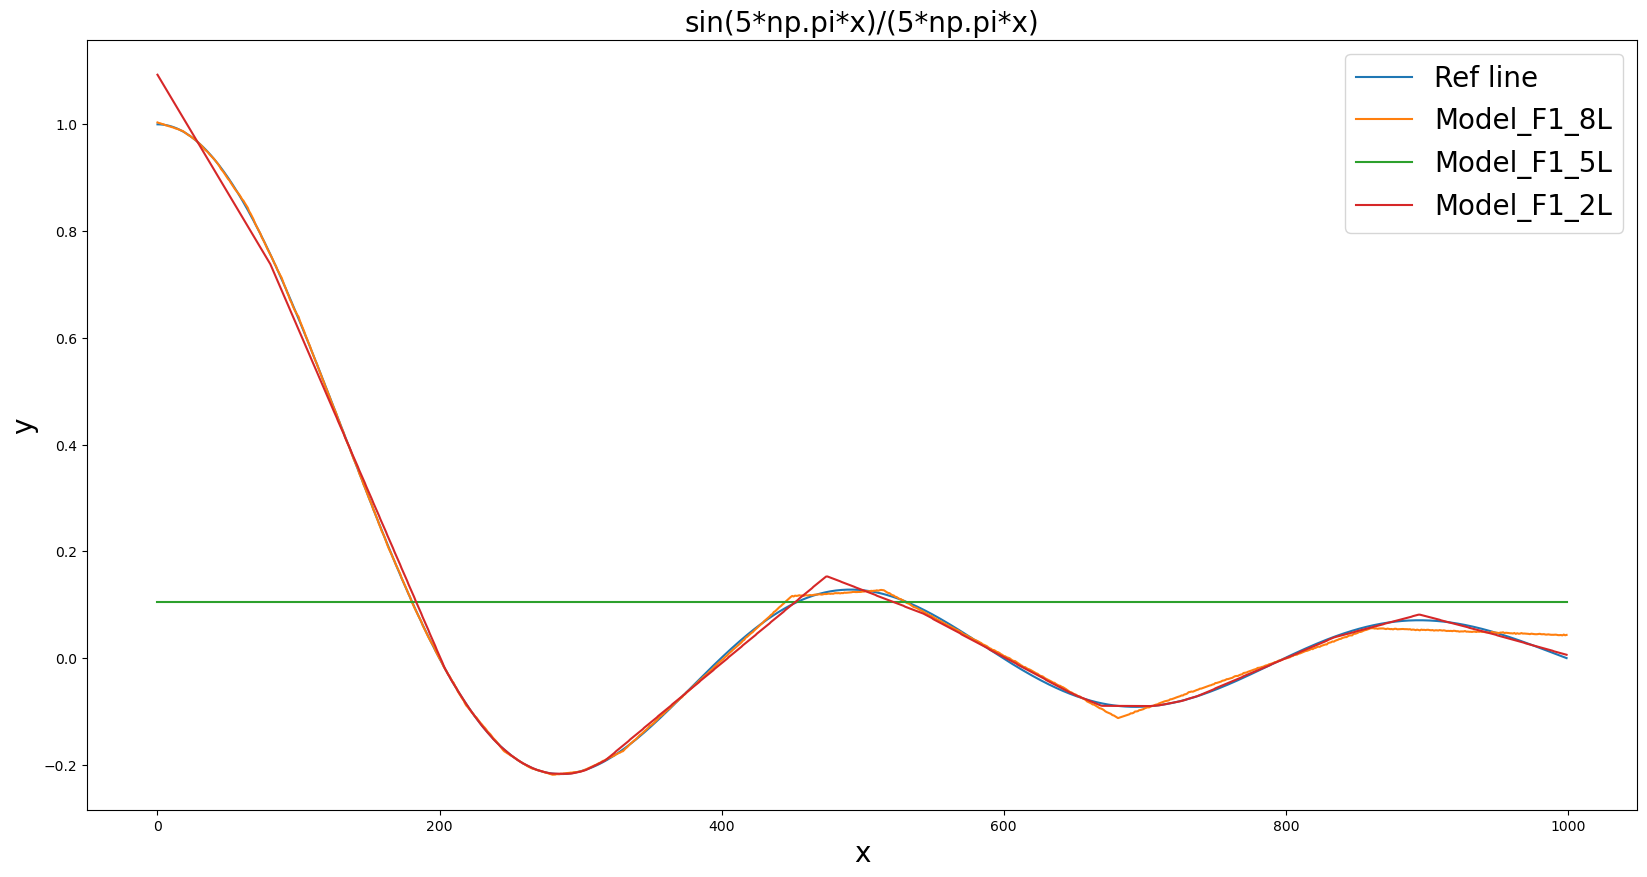

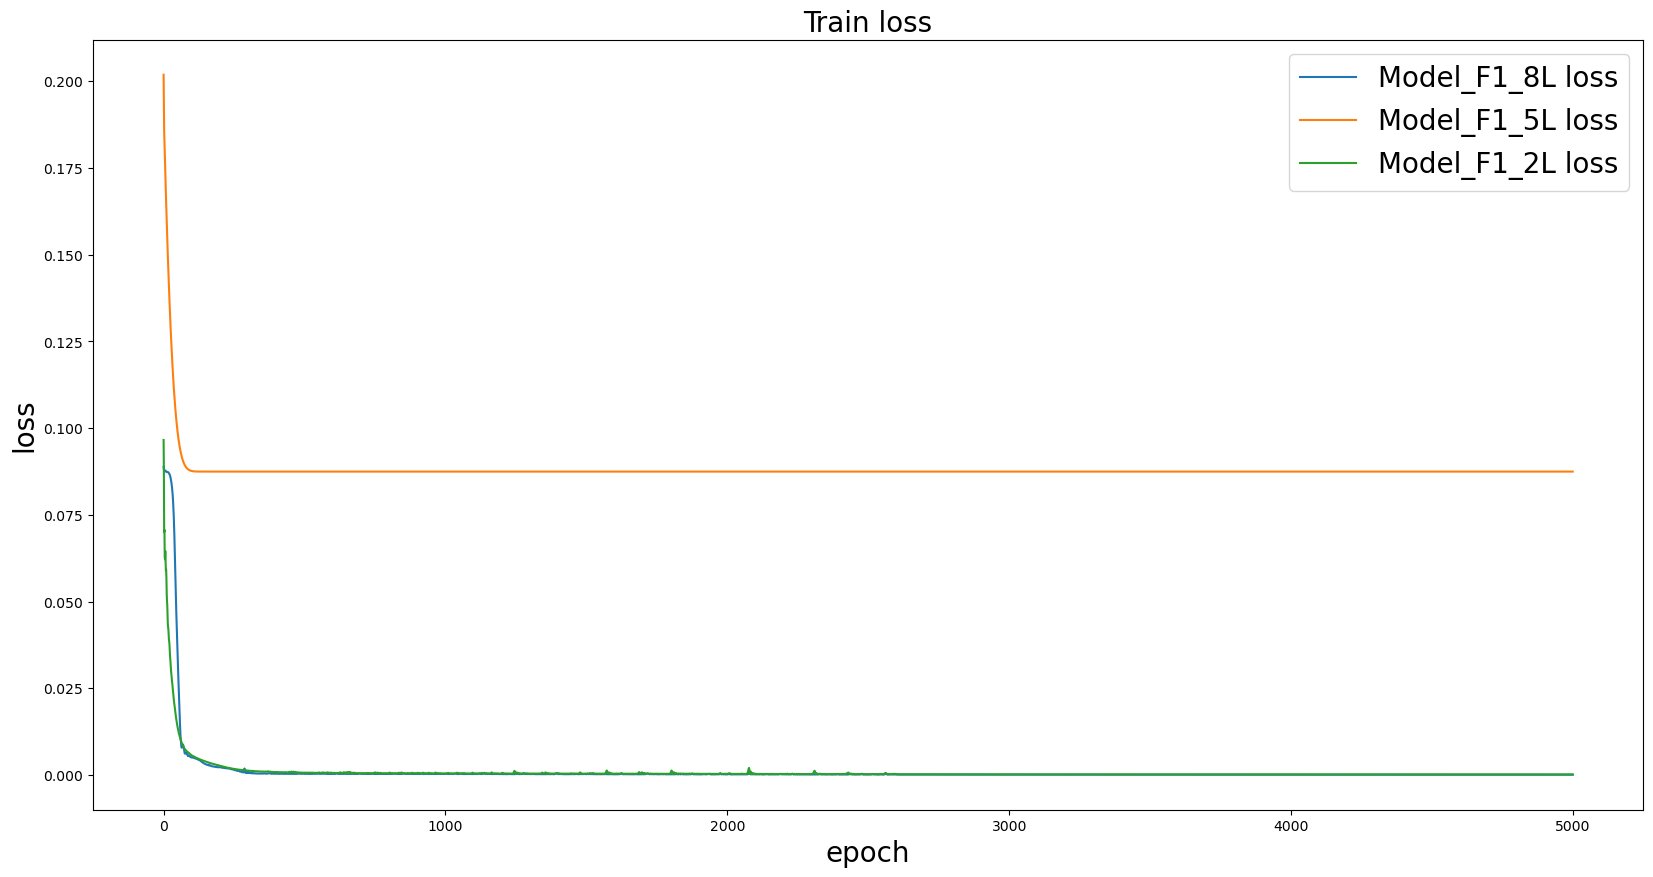

In [15]:
torch.cuda.is_available()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
x = torch.linspace(0,1,1000).unsqueeze(1)
x = x.to(device)
y = function1.to(device)
criterion = nn.MSELoss()

Model_F1_8L.eval()
Model_F1_5L.eval()
Model_F1_2L.eval()
with torch.no_grad():
    y_pred_F1_8L = Model_F1_8L(x)
    y_pred_F1_5L = Model_F1_5L(x)
    y_pred_F1_2L = Model_F1_2L(x)
    testloss_F1_8L = criterion(y_pred_F1_8L, y)
    testloss_F1_5L = criterion(y_pred_F1_5L, y)
    testloss_F1_2L = criterion(y_pred_F1_2L, y)
    print('Model_F1_8L loss: {}'.format(testloss_F1_8L))
    print('Model_F1_5L loss: {}'.format(testloss_F1_5L))
    print('Model_F1_2L loss: {}'.format(testloss_F1_2L))

plt.figure(figsize=(20,10))
plt.plot(y.cpu().numpy(),label='Ref line')
plt.plot(y_pred_F1_8L.detach().cpu().numpy(),label='Model_F1_8L')
plt.plot(y_pred_F1_5L.detach().cpu().numpy(),label='Model_F1_5L')
plt.plot(y_pred_F1_2L.detach().cpu().numpy(),label='Model_F1_2L')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.title('sin(5*np.pi*x)/(5*np.pi*x)',fontsize=20)
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(trainloss_F1_8L, label='Model_F1_8L loss')
plt.plot(trainloss_F1_5L, label='Model_F1_5L loss')
plt.plot(trainloss_F1_2L, label='Model_F1_2L loss')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20)
plt.title('Train loss',fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [16]:
[Model_F2_8L,trainloss_F2_8L,lr_F2_8L] = train(function2, DNN_8L_Model, Epochs=5000, Batch=1000, Data_workers=0, LR=0.005)
[Model_F2_5L,trainloss_F2_5L,lr_F2_5L] = train(function2, DNN_5L_Model, Epochs=5000, Batch=1000, Data_workers=0, LR=0.005)
[Model_F2_2L,trainloss_F2_2L,lr_F2_2L] = train(function2, DNN_2L_Model, Epochs=5000, Batch=1000, Data_workers=0, LR=0.005)

0/5000, loss: 0.9600096940994263
500/5000, loss: 0.5428025722503662
1000/5000, loss: 0.5386829376220703
1500/5000, loss: 0.5465179085731506
2000/5000, loss: 0.5596826672554016
2500/5000, loss: 0.06379742175340652
3000/5000, loss: 0.027715761214494705
3500/5000, loss: 0.02180306427180767
4000/5000, loss: 0.020665109157562256
4500/5000, loss: 0.020045064389705658
0/5000, loss: 0.959647536277771
500/5000, loss: 0.5457130670547485
1000/5000, loss: 0.5415025949478149
1500/5000, loss: 0.5382223129272461
2000/5000, loss: 0.5377762317657471
2500/5000, loss: 0.5363697409629822
3000/5000, loss: 0.5359899401664734
3500/5000, loss: 0.5357400178909302
4000/5000, loss: 0.5356199145317078
4500/5000, loss: 0.5357403755187988
0/5000, loss: 1.057806372642517
500/5000, loss: 0.648601233959198
1000/5000, loss: 0.62505042552948
1500/5000, loss: 0.5991261601448059
2000/5000, loss: 0.5882933139801025
2500/5000, loss: 0.581540584564209
3000/5000, loss: 0.5776863098144531
3500/5000, loss: 0.5764163136482239
40

Model_F2_8L loss: 0.02047920413315296
Model_F2_5L loss: 0.535820722579956
Model_F2_2L loss: 0.5756163597106934


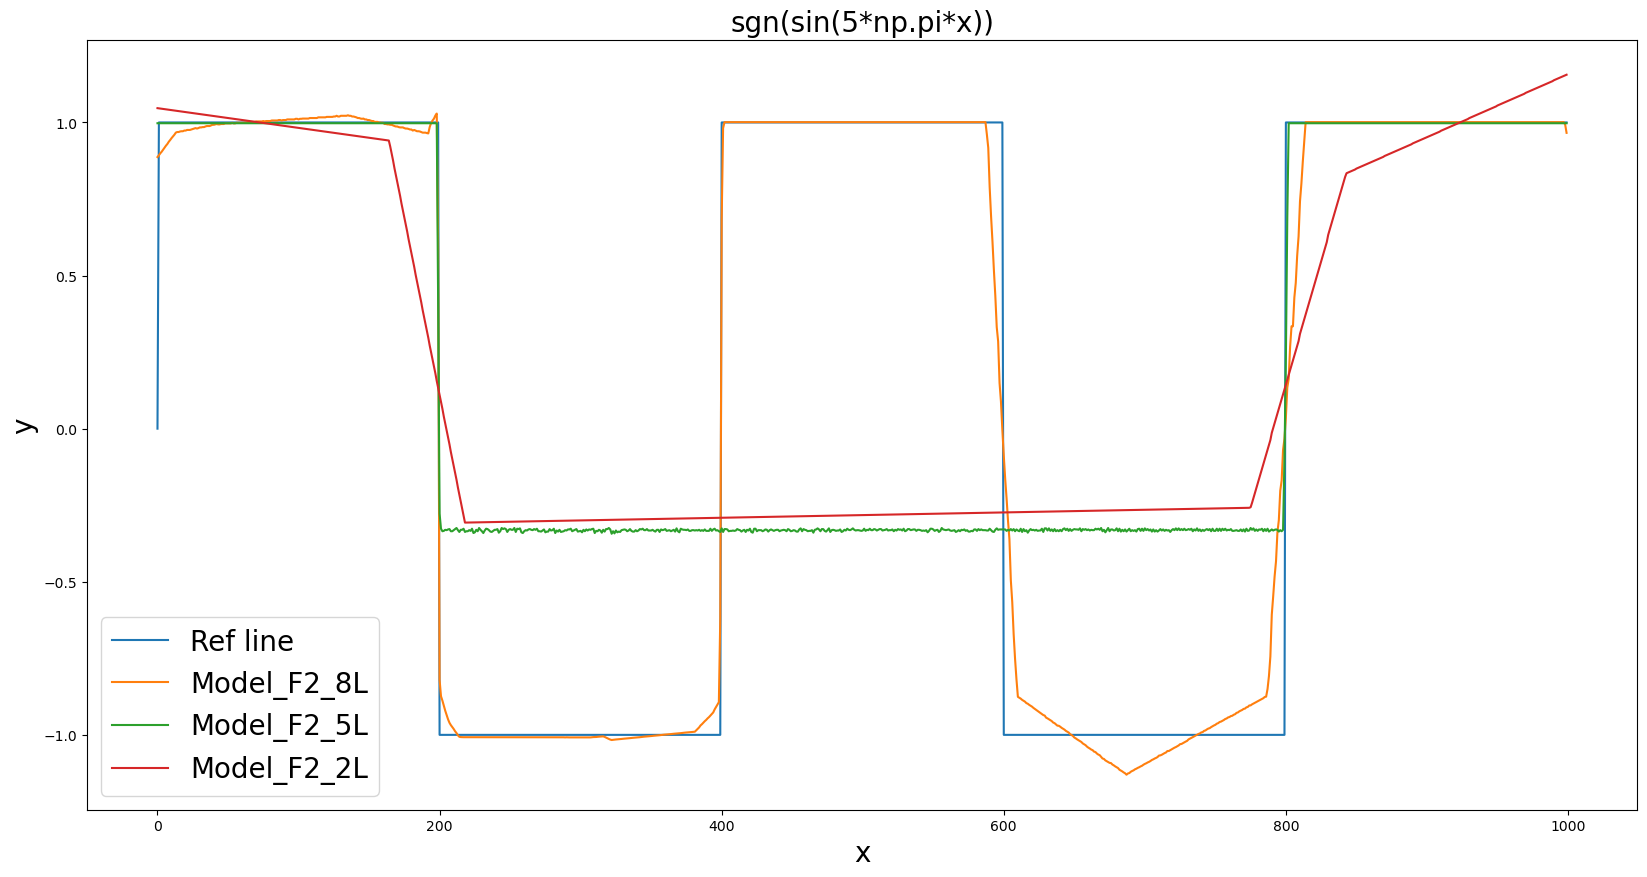

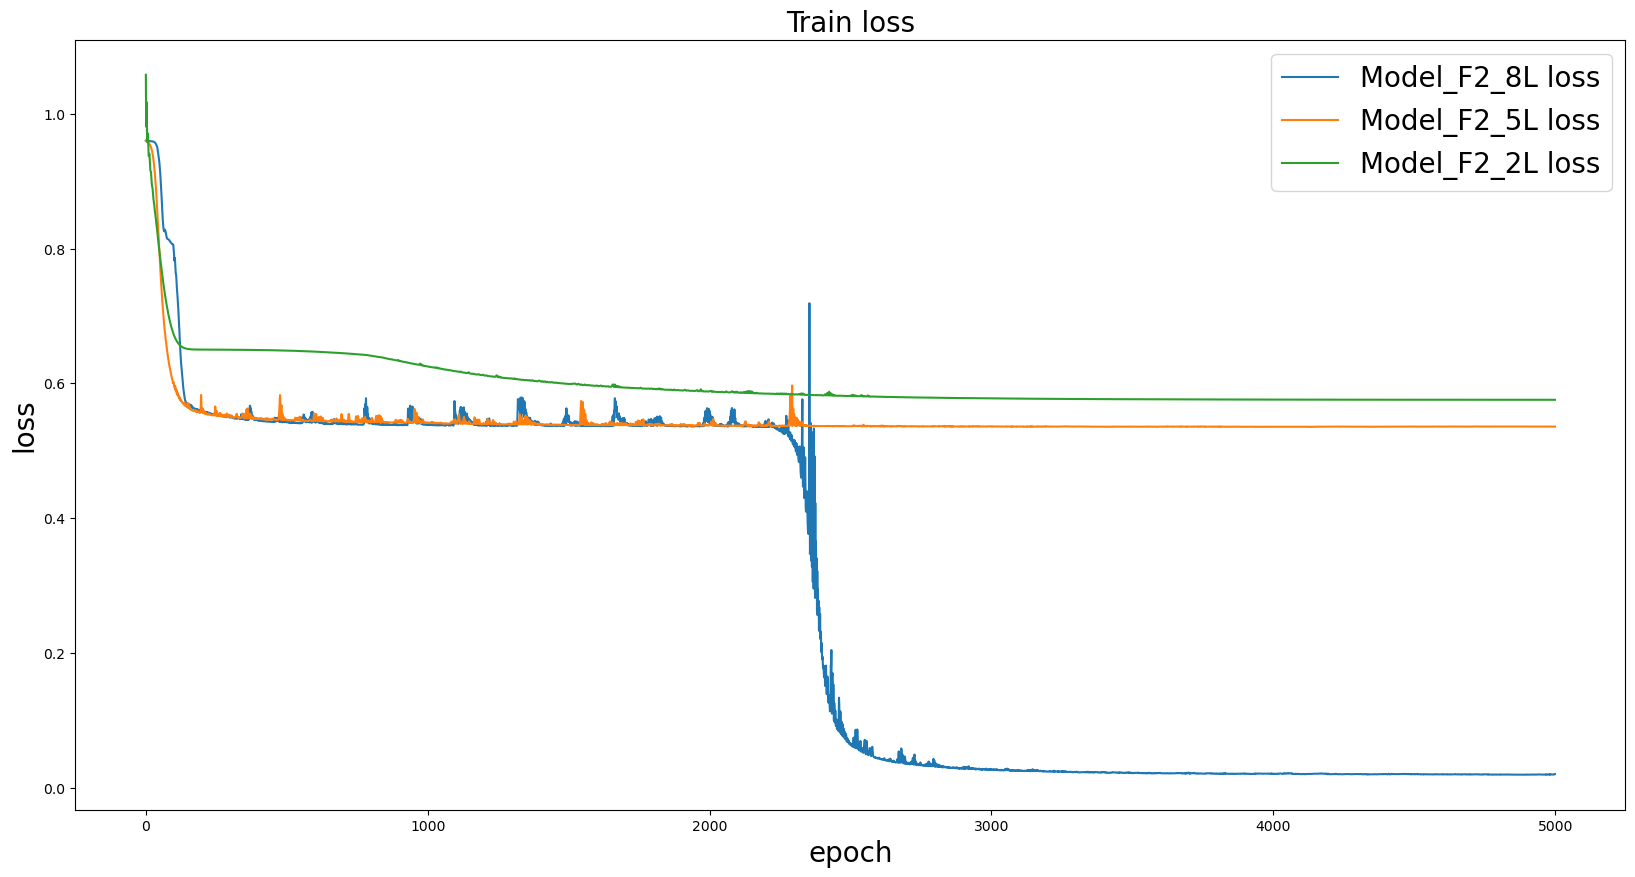

In [17]:
torch.cuda.is_available()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
x = torch.linspace(0,1,1000).unsqueeze(1)
x = x.to(device)
y = function2.to(device)
criterion = nn.MSELoss()

Model_F2_8L.eval()
Model_F2_5L.eval()
Model_F2_2L.eval()
with torch.no_grad():
    y_pred_F2_8L = Model_F2_8L(x)
    y_pred_F2_5L = Model_F2_5L(x)
    y_pred_F2_2L = Model_F2_2L(x)
    testloss_F2_8L = criterion(y_pred_F2_8L, y)
    testloss_F2_5L = criterion(y_pred_F2_5L, y)
    testloss_F2_2L = criterion(y_pred_F2_2L, y)
    print('Model_F2_8L loss: {}'.format(testloss_F2_8L))
    print('Model_F2_5L loss: {}'.format(testloss_F2_5L))
    print('Model_F2_2L loss: {}'.format(testloss_F2_2L))

plt.figure(figsize=(20,10))
plt.plot(y.cpu().numpy(),label='Ref line')
plt.plot(y_pred_F2_8L.detach().cpu().numpy(),label='Model_F2_8L')
plt.plot(y_pred_F2_5L.detach().cpu().numpy(),label='Model_F2_5L')
plt.plot(y_pred_F2_2L.detach().cpu().numpy(),label='Model_F2_2L')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.title('sgn(sin(5*np.pi*x))',fontsize=20)
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(trainloss_F2_8L, label='Model_F2_8L loss')
plt.plot(trainloss_F2_5L, label='Model_F2_5L loss')
plt.plot(trainloss_F2_2L, label='Model_F2_2L loss')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20)
plt.title('Train loss',fontsize=20)
plt.legend(fontsize=20)
plt.show()

## 5. My Models: CNN with 6 Layers, 5 Layers, 4 Layers
## Dataset: CIFAR

In [18]:
# CNN with 6 Layers
class CNN_6L_Model(nn.Module):
    def __init__(self):
        super(CNN_6L_Model, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(3, 10, 3),nn.ReLU(True),nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        self.layer2 = nn.Sequential(nn.Conv2d(10, 16, 3),nn.ReLU(True),nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        self.layer3 = nn.Sequential(nn.Conv2d(16, 32, 3),nn.ReLU(True))
        self.layer4 = nn.Sequential(nn.Linear(32*4*4, 128),nn.ReLU(True))
        self.layer5 = nn.Sequential(nn.Linear(128, 32),nn.ReLU(True))
        self.layer6 = nn.Sequential(nn.Linear(32, 10))
    def forward(self, x):
        x = self.layer1(x) 
        x = self.layer2(x)    
        x = self.layer3(x) 
        x = x.view(x.size()[0], -1)
        x = self.layer4(x)    
        x = self.layer5(x)    
        x = self.layer6(x)    
        return x
    
device = torch.device("cuda")
Model = CNN_6L_Model().to(device)
summary(Model, input_size=(3,32,32))

# CNN with 5 Layers
class CNN_5L_Model(nn.Module):
    def __init__(self):
        super(CNN_5L_Model, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(3, 6, 5),nn.ReLU(True),nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        self.layer2 = nn.Sequential(nn.Conv2d(6, 16, 5),nn.ReLU(True),nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        self.layer3 = nn.Sequential(nn.Linear(16*5*5, 64),nn.ReLU(True))
        self.layer4 = nn.Sequential(nn.Linear(64, 32),nn.ReLU(True))
        self.layer5 = nn.Sequential(nn.Linear(32, 10))
    def forward(self, x):
        x = self.layer1(x) 
        x = self.layer2(x)  
        x = x.view(x.size()[0], -1)
        x = self.layer3(x) 
        x = self.layer4(x)    
        x = self.layer5(x)     
        return x
    
device = torch.device("cuda")
Model = CNN_5L_Model().to(device)
summary(Model, input_size=(3,32,32))

# CNN with 4 Layers
class CNN_4L_Model(nn.Module):
    def __init__(self):
        super(CNN_4L_Model, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(3, 16, 5),nn.ReLU(True),nn.MaxPool2d(kernel_size=(3, 3), stride=3))
        self.layer2 = nn.Sequential(nn.Linear(16*9*9, 64),nn.ReLU(True))
        self.layer3 = nn.Sequential(nn.Linear(64, 32),nn.ReLU(True))
        self.layer4 = nn.Sequential(nn.Linear(32, 10))
    def forward(self, x):
        x = self.layer1(x) 
        x = x.view(x.size()[0], -1)
        x = self.layer2(x)  
        x = self.layer3(x) 
        x = self.layer4(x)    
        return x
    
device = torch.device("cuda")
Model = CNN_4L_Model().to(device)
summary(Model, input_size=(3,32,32))


class DNN_MNIST(nn.Module):
    def __init__(self, in_dim, hidden_1, hidden_2, hidden_3, out_dim):
        super(DNN_MNIST, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(in_dim, hidden_1),nn.BatchNorm1d(hidden_1),nn.ReLU(True))
        self.layer2 = nn.Sequential(nn.Linear(hidden_1, hidden_2),nn.BatchNorm1d(hidden_2),nn.ReLU(True))
        self.layer3 = nn.Sequential(nn.Linear(hidden_2, hidden_3),nn.BatchNorm1d(hidden_3),nn.ReLU(True))
        self.layer4 = nn.Sequential(nn.Linear(hidden_3, out_dim))
    def forward(self, x):
        x = self.layer1(x) 
        x = self.layer2(x)    
        x = self.layer3(x)    
        x = self.layer4(x)
        return x


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 30, 30]             280
              ReLU-2           [-1, 10, 30, 30]               0
         MaxPool2d-3           [-1, 10, 15, 15]               0
            Conv2d-4           [-1, 16, 13, 13]           1,456
              ReLU-5           [-1, 16, 13, 13]               0
         MaxPool2d-6             [-1, 16, 6, 6]               0
            Conv2d-7             [-1, 32, 4, 4]           4,640
              ReLU-8             [-1, 32, 4, 4]               0
            Linear-9                  [-1, 128]          65,664
             ReLU-10                  [-1, 128]               0
           Linear-11                   [-1, 32]           4,128
             ReLU-12                   [-1, 32]               0
           Linear-13                   [-1, 10]             330
Total params: 76,498
Trainable params: 

## 6. CNN for CIFAR10 Dataset

In [19]:
# Define train function
def train_CIFAR(model_name,
                Epochs = 100,
                Batch  = 2000,
                Data_workers = 0,
                LR = 0.1):

# Initiate data
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
    trainset = torchvision.datasets.CIFAR10(root='./data/',train=True,download=True,transform=transform)
    testset = torchvision.datasets.CIFAR10(root='./data/',train=False,download=True,transform=transform)
    trainloader = DataLoader(trainset, batch_size=Batch, shuffle=True, num_workers=Data_workers)
    testloader  = DataLoader(testset,  batch_size=Batch, shuffle=True, num_workers=Data_workers)
    print(trainset.classes)
    print(trainset.data.shape)
    print(testset.data.shape)
    
# Initiate model
    torch.cuda.is_available()
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
    Model = model_name().to(device)

# loss & optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(Model.parameters(), lr=LR, momentum=0.9)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.8)
    
# Training
    trainloss_list = []
    testloss_list  = []
    accuracy_list  = []
    lr_list = []
   
    for epoch in range(Epochs):
        Model.train()
        train_loss = 0.0
        for i, data in enumerate(trainloader):
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = Model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            total = (i+1)*Batch

# Evaluating
        Model.eval()
        with torch.no_grad():
            test_loss = 0
            correct = 0
            total = 0
            for data in testloader:
                images, labels = data
                images = images.to(device)
                labels = labels.to(device)
                outputs = Model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, pred = torch.max(outputs.data, 1)
                correct += (pred == labels).cpu().sum()
                total += labels.size(0)
            total = len(testloader.dataset)
            accuracy = 100.0*correct/total

# Save loss
        scheduler.step()
        lr_list.append(optimizer.state_dict()['param_groups'][0]['lr'])
        trainloss_list.append(train_loss)
        testloss_list.append(test_loss)
        accuracy_list.append(accuracy)
        print('{}/{} Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%) lr={}'.format(
                epoch, Epochs,test_loss, correct, total, accuracy, lr_list[-1]))

    return [trainloss_list,
            testloss_list,
            accuracy_list,
            lr_list]

In [20]:
[trainloss_CIFAR_6L, testloss_CIFAR_6L, accuracy_CIFAR_6L, lr_CIFAR_6L] = train_CIFAR(model_name=CNN_6L_Model,Epochs=100,Batch=2000,Data_workers=0,LR=0.1)
[trainloss_CIFAR_5L, testloss_CIFAR_5L, accuracy_CIFAR_5L, lr_CIFAR_5L] = train_CIFAR(model_name=CNN_5L_Model,Epochs=100,Batch=2000,Data_workers=0,LR=0.1)
[trainloss_CIFAR_4L, testloss_CIFAR_4L, accuracy_CIFAR_4L, lr_CIFAR_4L] = train_CIFAR(model_name=CNN_4L_Model,Epochs=100,Batch=2000,Data_workers=0,LR=0.1)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data/
Files already downloaded and verified
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 32, 32, 3)
(10000, 32, 32, 3)
0/100 Test set: Average loss: 11.4972, Accuracy: 1196/10000 (11.96%) lr=0.1
1/100 Test set: Average loss: 10.9948, Accuracy: 2017/10000 (20.17%) lr=0.1
2/100 Test set: Average loss: 9.8133, Accuracy: 2814/10000 (28.14%) lr=0.1
3/100 Test set: Average loss: 12.1110, Accuracy: 2432/10000 (24.32%) lr=0.1
4/100 Test set: Average loss: 8.9427, Accuracy: 3513/10000 (35.13%) lr=0.08000000000000002
5/100 Test set: Average loss: 7.8767, Accuracy: 4259/10000 (42.59%) lr=0.08000000000000002
6/100 Test set: Average loss: 7.3213, Accuracy: 4692/10000 (46.92%) lr=0.08000000000000002
7/100 Test set: Average loss: 7.1701, Accuracy: 4801/10000 (48.01%) lr=0.08000000000000002
8/100 Test set: Average loss: 7.0645, Accuracy: 4906/10000 (49.06%) lr=0.08000000000000002
9/100 Test set: Average

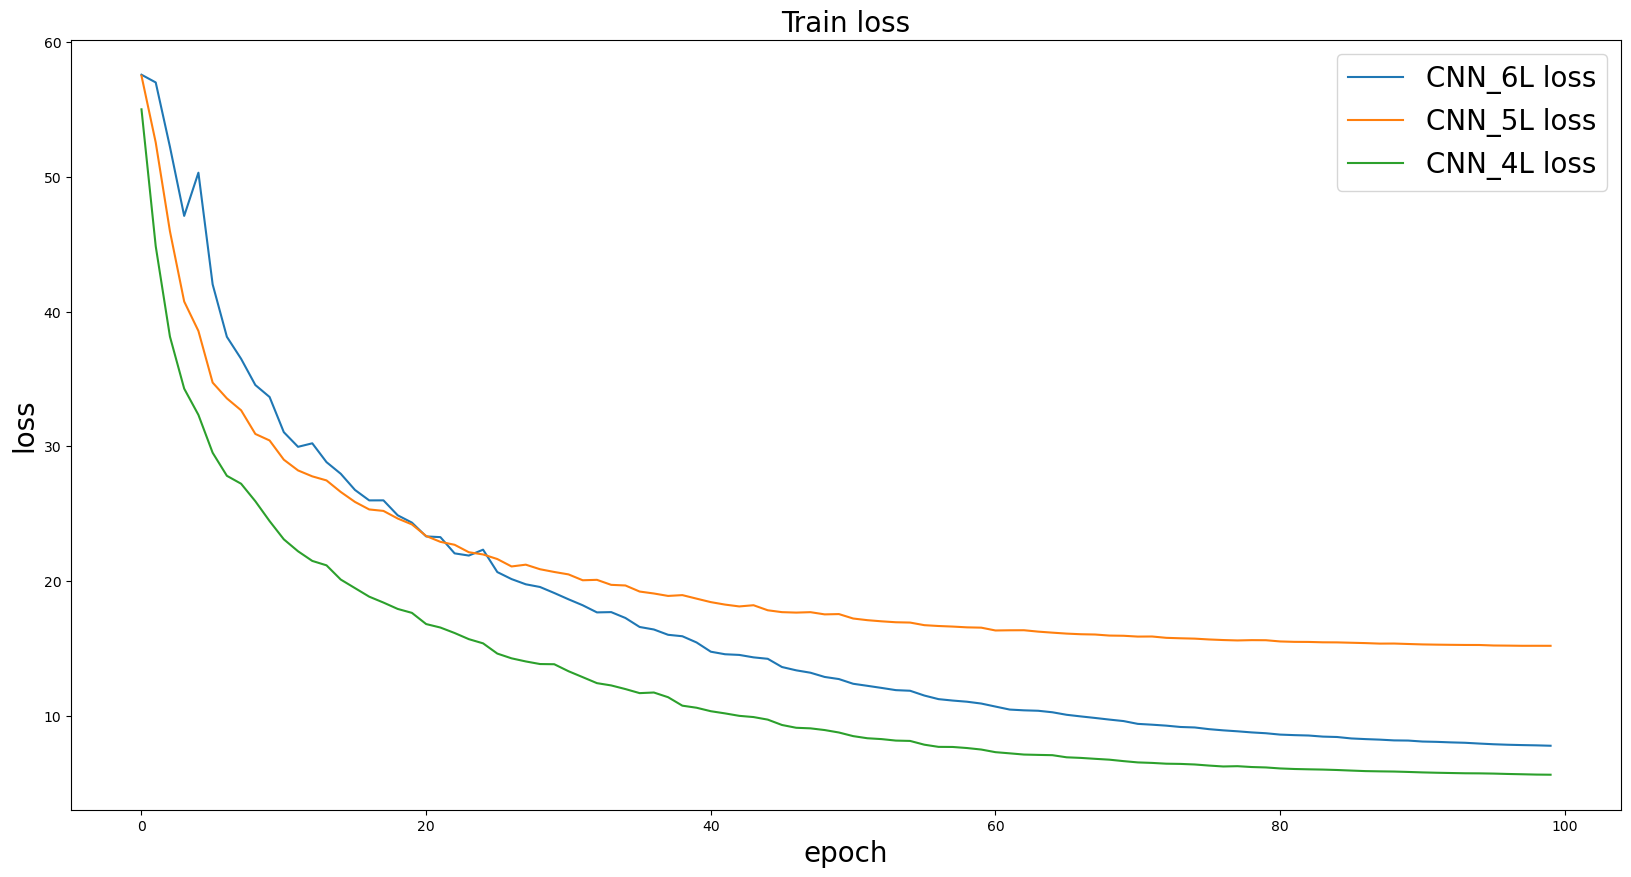

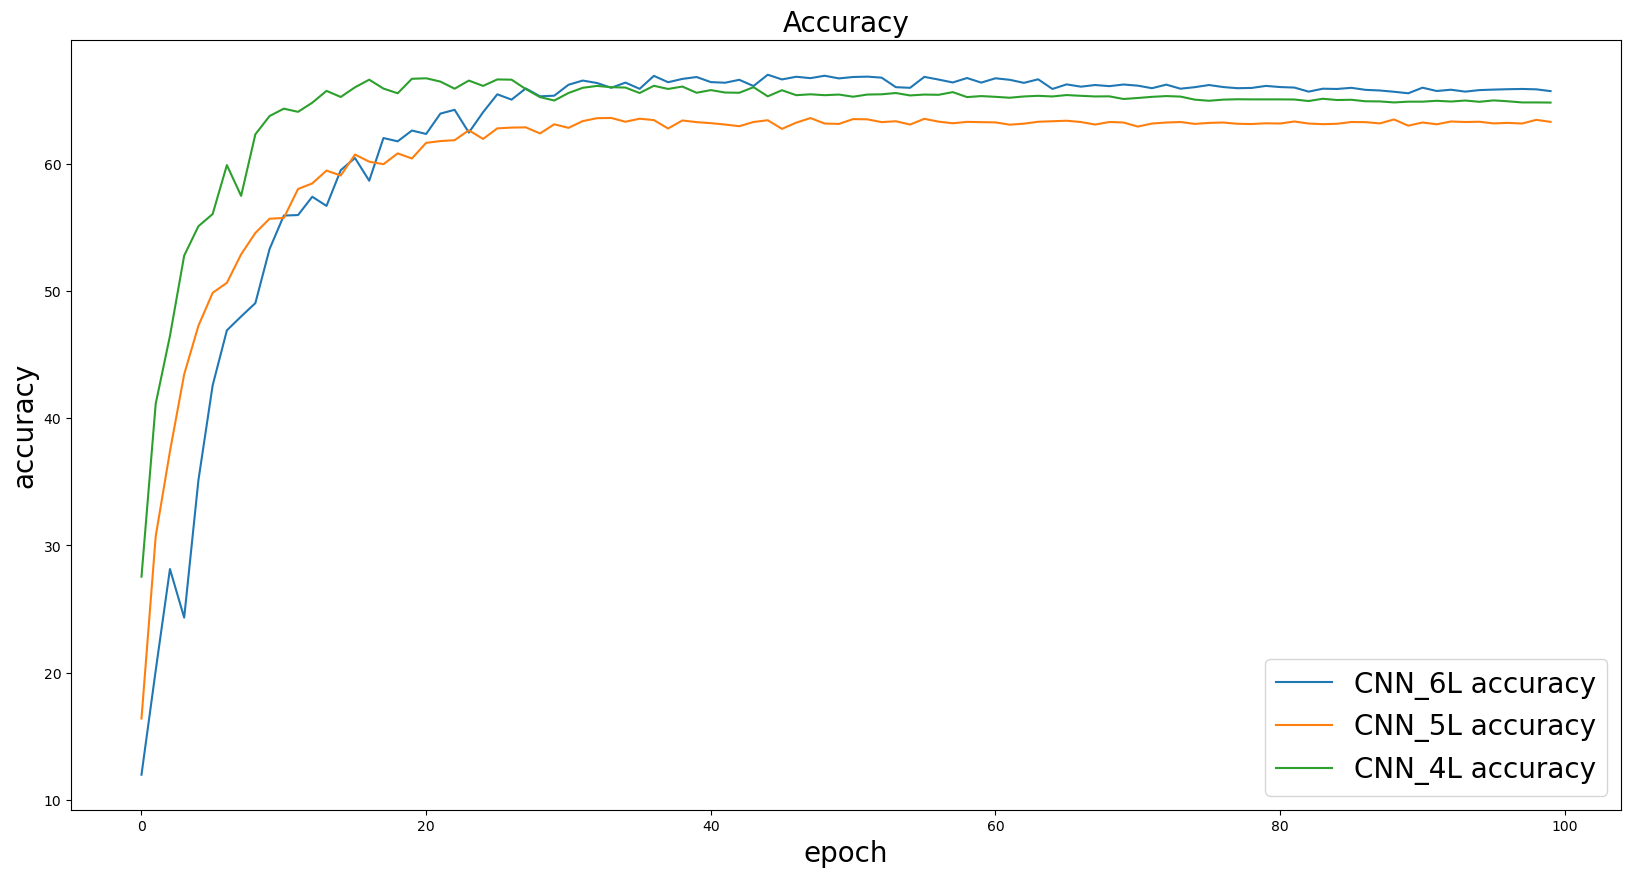

In [21]:
# Plot loss & acc
plt.figure(figsize=(20,10))
plt.plot(trainloss_CIFAR_6L, label='CNN_6L loss')
plt.plot(trainloss_CIFAR_5L, label='CNN_5L loss')
plt.plot(trainloss_CIFAR_4L, label='CNN_4L loss')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20)
plt.title('Train loss',fontsize=20)
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(accuracy_CIFAR_6L, label='CNN_6L accuracy')
plt.plot(accuracy_CIFAR_5L, label='CNN_5L accuracy')
plt.plot(accuracy_CIFAR_4L, label='CNN_4L accuracy')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('accuracy',fontsize=20)
plt.title('Accuracy',fontsize=20)
plt.legend(fontsize=20)
plt.show()

## 7. DNN for MNIST Dataset

In [22]:
# Define train function
def train_MNIST(model_name,
                Epochs = 50,
                Batch  = 2000,
                Data_workers = 0,
                LR = 0.1):
# Initiate data
    trainset = torchvision.datasets.MNIST(root='./data/',train=True,download=True,transform=transforms.ToTensor())
    testset = torchvision.datasets.MNIST(root='./data/',train=False,download=True,transform=transforms.ToTensor())
    trainloader = DataLoader(trainset, batch_size=Batch, shuffle=True, num_workers=Data_workers)
    testloader  = DataLoader(testset,  batch_size=Batch, shuffle=True, num_workers=Data_workers)
    print(trainset.classes)
    print(trainset.data.shape)
    print(testset.data.shape)

# Initiate model
    torch.cuda.is_available()
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
    Model = model_name.to(device)
    
# loss & optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(Model.parameters(), lr=LR, momentum=0.9)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.8)
    
# Training
    trainloss_list = []
    testloss_list  = []
    accuracy_list  = []
    lr_list = []
    for epoch in range(Epochs):
        Model.train()
        train_loss = 0.0
        for i, data in enumerate(trainloader):
            images, labels = data
            images = (images.view(-1, 28*28)).to(device)
            labels = labels.to(device)
            outputs = Model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            total = (i+1)*Batch
        
# Evaluating      
        Model.eval()
        with torch.no_grad():
            test_loss = 0
            correct = 0
            total = 0
            for data in testloader:
                images, labels = data
                images = (images.view(-1, 28*28)).to(device)
                labels = labels.to(device)
                outputs = Model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, pred = torch.max(outputs.data, 1)
                correct += (pred == labels).cpu().sum()
                total += labels.size(0)
            total = len(testloader.dataset)
            accuracy = 100.0*correct/total
        
# Save loss      
        scheduler.step()
        lr_list.append(optimizer.state_dict()['param_groups'][0]['lr'])
        trainloss_list.append(train_loss)
        testloss_list.append(test_loss)
        accuracy_list.append(accuracy)
        print('{}/{} Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%) lr={}'.format(
                epoch, Epochs,test_loss, correct, total, accuracy, lr_list[-1]))

    return [trainloss_list,
            testloss_list,
            accuracy_list,
            lr_list]

In [23]:
[trainloss_MNIST1, testloss_MNIST1, accuracy_MNIST1, lr_MNIST1] = train_MNIST(model_name=DNN_MNIST(28*28,1,2,1,10))
[trainloss_MNIST2, testloss_MNIST2, accuracy_MNIST2, lr_MNIST2] = train_MNIST(model_name=DNN_MNIST(28*28,2,4,2,10))
[trainloss_MNIST3, testloss_MNIST3, accuracy_MNIST3, lr_MNIST3] = train_MNIST(model_name=DNN_MNIST(28*28,4,8,4,10))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\raw

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
0/50 Test set: Average loss: 12.7659, Accuracy: 285/10000 (2.85%) lr=0.1
1/50 Test set: Average loss: 11.5047, Accuracy: 1135/10000 (11.35%) lr=0.1
2/50 Test set: Average loss: 11.5052, Accuracy: 1135/10000 (11.35%) lr=0.1
3/50 Test set: Average loss: 11.5053, Accuracy: 1135/10000 (11.35%) lr=0.1
4/50 Test set: Average loss: 11.5054, Accuracy: 1135/10000 (11.35%) lr=0.08000000000000002
5/50 Test set: Average loss: 11.5051, Accuracy: 1135/10000 (11.35%) lr=0.08000000000000002
6/50 Test set: Average loss: 11.5055, Accuracy: 1135/10000 (11.35%) lr=0.08000000000000002
7/50 Test set: Average loss: 11.5052, Accuracy: 1135/10000 (11.35%) lr=0.08000000000000002
8/50 Test set: Average loss: 11.5051, Accuracy: 1135/10000 (11.35%) lr=0.0800000000000

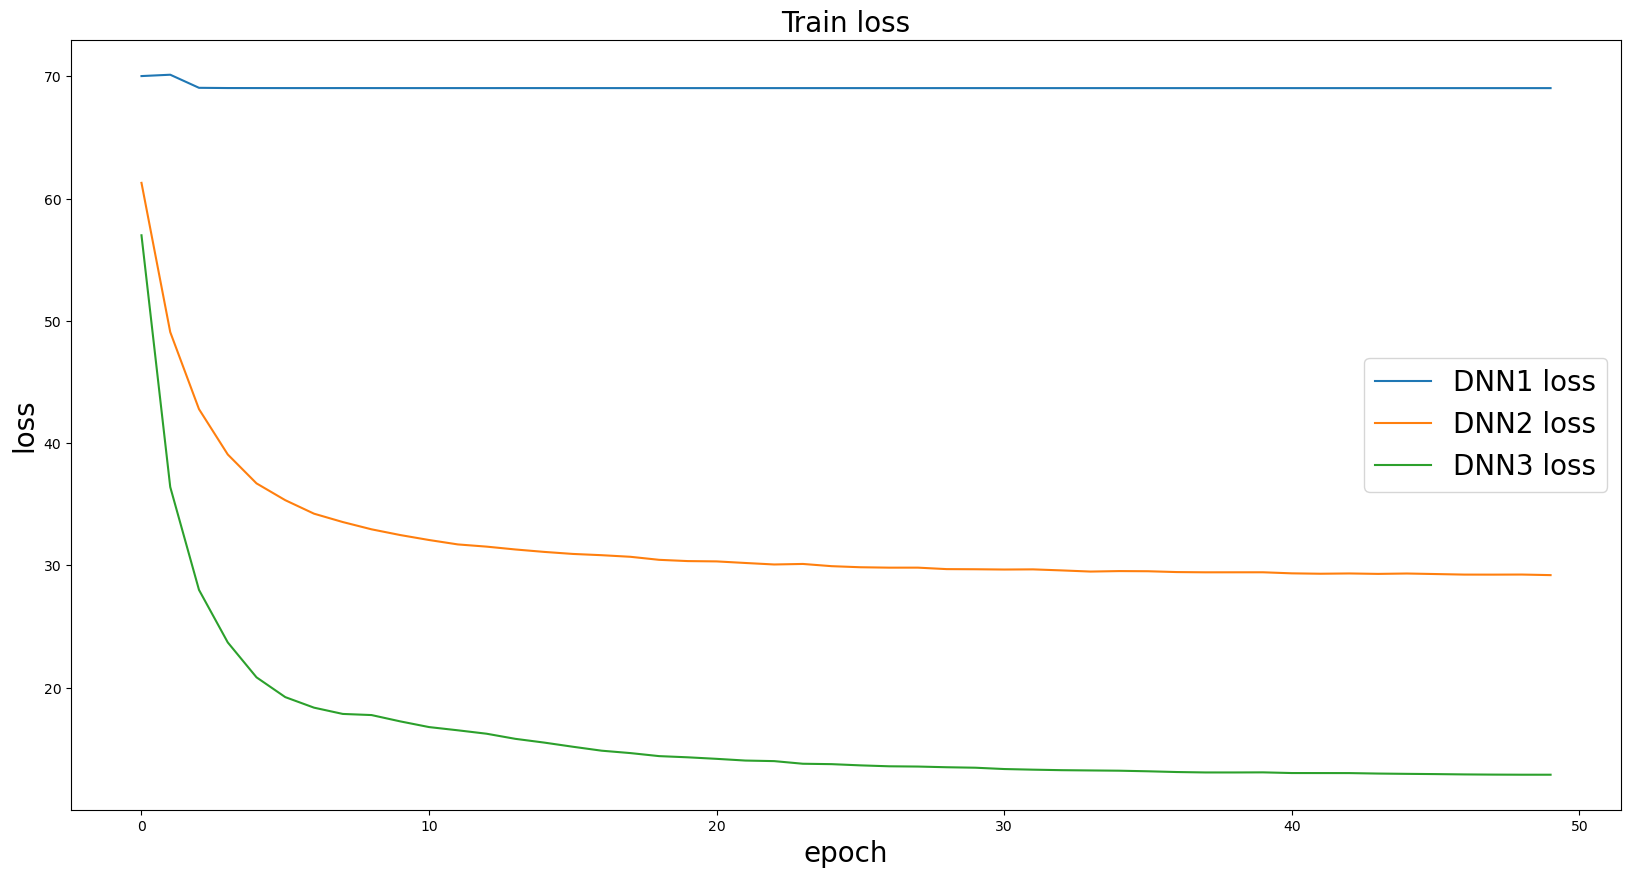

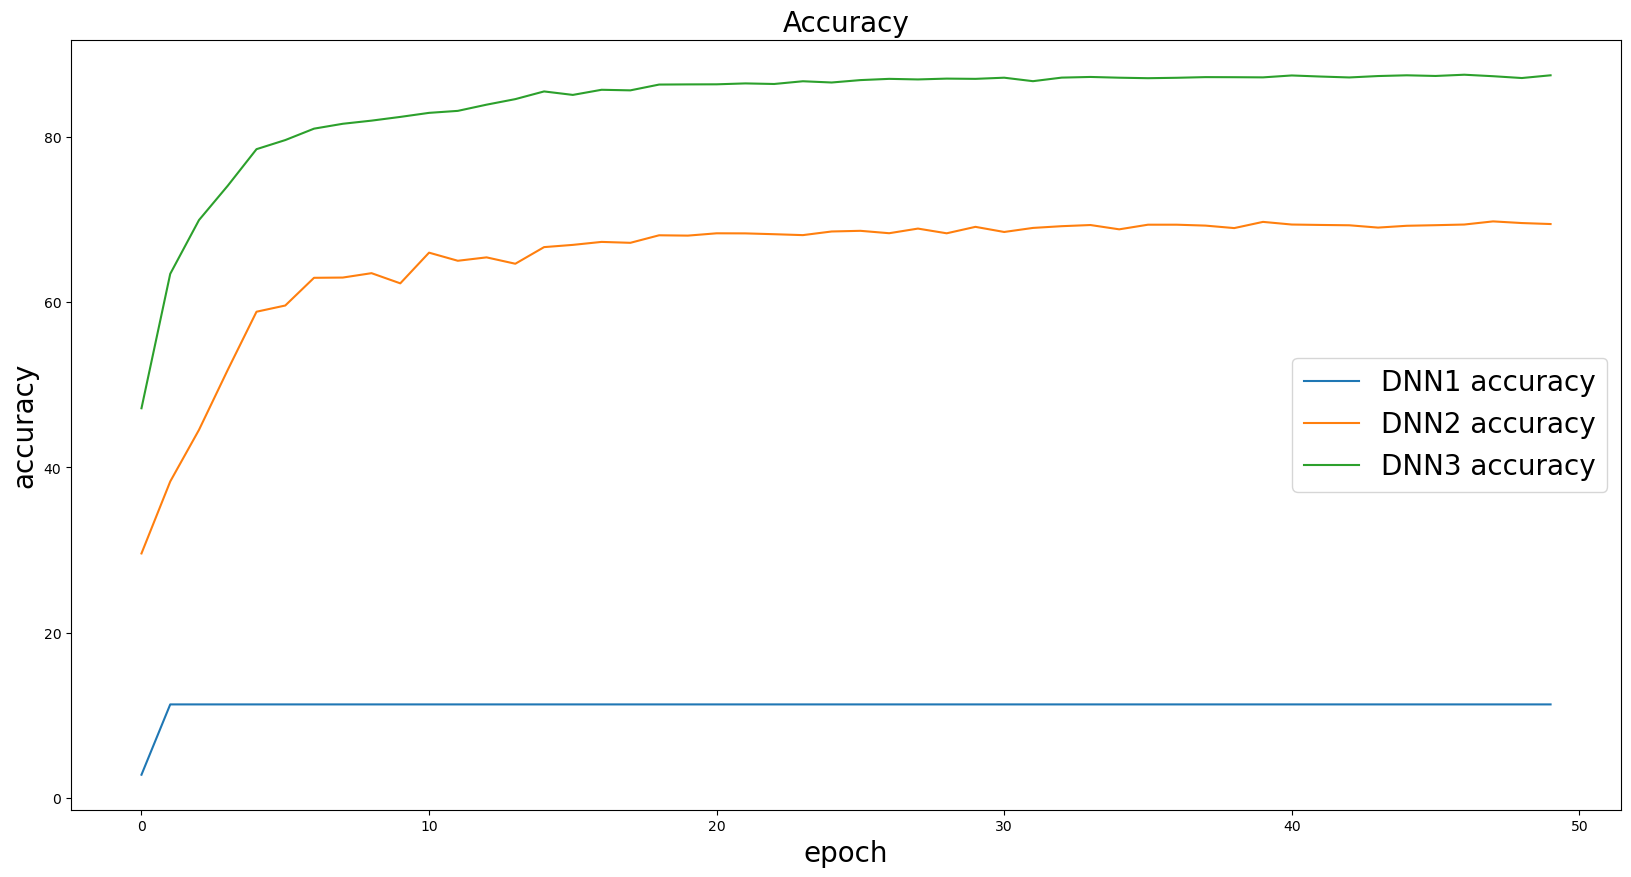

In [24]:
# Plot loss & acc
plt.figure(figsize=(20,10))
plt.plot(trainloss_MNIST1, label='DNN1 loss')
plt.plot(trainloss_MNIST2, label='DNN2 loss')
plt.plot(trainloss_MNIST3, label='DNN3 loss')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20)
plt.title('Train loss',fontsize=20)
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(accuracy_MNIST1, label='DNN1 accuracy')
plt.plot(accuracy_MNIST2, label='DNN2 accuracy')
plt.plot(accuracy_MNIST3, label='DNN3 accuracy')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('accuracy',fontsize=20)
plt.title('Accuracy',fontsize=20)
plt.legend(fontsize=20)
plt.show()